In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

import sys
sys.path.append("../")
from src.scalers import *
from src.metrics import *

# Keras

### Load data

In [29]:
dataset = pd.DataFrame(pd.read_csv('../input/digit-recognizer/train.csv'))
dataset = np.array(dataset, dtype='float64')
X, y = dataset[:, 1:], dataset[:, 0, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Creating model

In [30]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1182/1182 [==============================] - 2s 2ms/step - loss: 1.9866 - accuracy: 0.8550
Epoch 2/3
1182/1182 [==============================] - 2s 2ms/step - loss: 0.4640 - accuracy: 0.9152
Epoch 3/3
1182/1182 [==============================] - 2s 2ms/step - loss: 0.3203 - accuracy: 0.9308


In [32]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

132/132 [==============================] - 0s 1ms/step - loss: 0.3144 - accuracy: 0.9281
0.3143683671951294
0.9280952215194702


In [35]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
y_pred = new_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


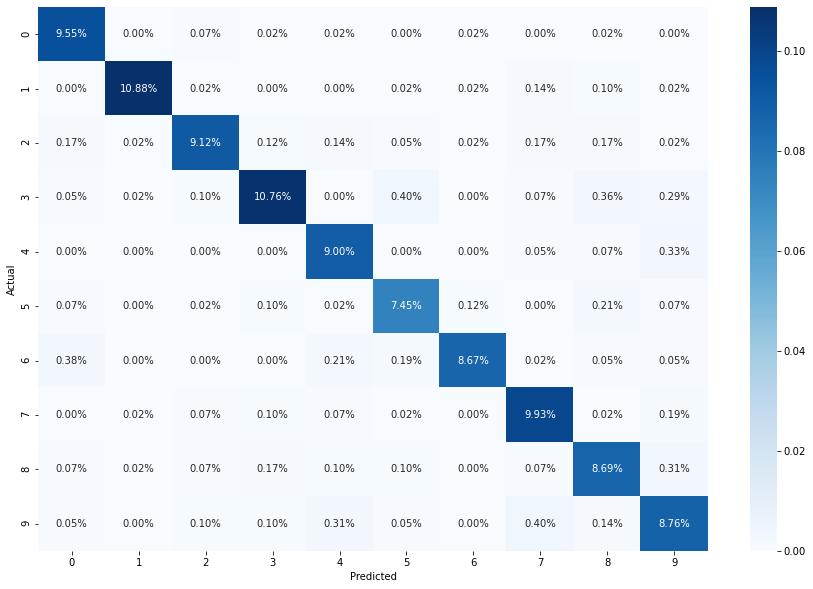

In [36]:
accuracy = plot_confusion_matrix(y_test, y_pred, fig_size=(15, 10))

In [37]:
print(f'Accuracy {accuracy}')

Accuracy 0.9280952380952381
